In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [16]:
# Define paths to the folders
base_dir = './datasets/dataset_ready/datasets_images'
categories = ['RPi1Dump', 'RPi2Dump', 'RPi3Dump']

In [17]:
# Image parameters
img_height, img_width = 64, 64
batch_size = 32

In [18]:
# Load images and labels
def load_data(base_dir, categories, img_height, img_width):
    images = []
    labels = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(base_dir, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [19]:
# Load the data
images, labels = load_data(base_dir, categories, img_height, img_width)


In [20]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [21]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
# Print the shapes of the datasets
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training data shape: (1444, 64, 64, 3)
Testing data shape: (362, 64, 64, 3)
Training labels shape: (1444,)
Testing labels shape: (362,)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
def build_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
# Get the input shape
input_shape = (img_height, img_width, 3)

# Build the model
cnn_model = build_cnn(input_shape)

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Train the model
history = cnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=batch_size)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8005 - loss: 0.5007 - val_accuracy: 1.0000 - val_loss: 3.8071e-05
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 1.8796e-05
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.6498e-07
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9999 - loss: 6.8314e-04 - val_accuracy: 1.0000 - val_loss: 1.0413e-06
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 1.0000 - loss: 7.5212e-04 - val_accuracy: 1.0000 - val_loss: 4.4292e-07
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 3.0148e-04 - val_accuracy: 1.0000 - val_loss: 1.3699e-07
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 3.2292e-04 - val_accuracy: 1.0000 - val_loss: 1.6136e-08
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accura

In [26]:
# Save the trained CNN model
cnn_model.save('cnn_model.h5')


In [27]:
# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
CNN Model Accuracy: 1.0


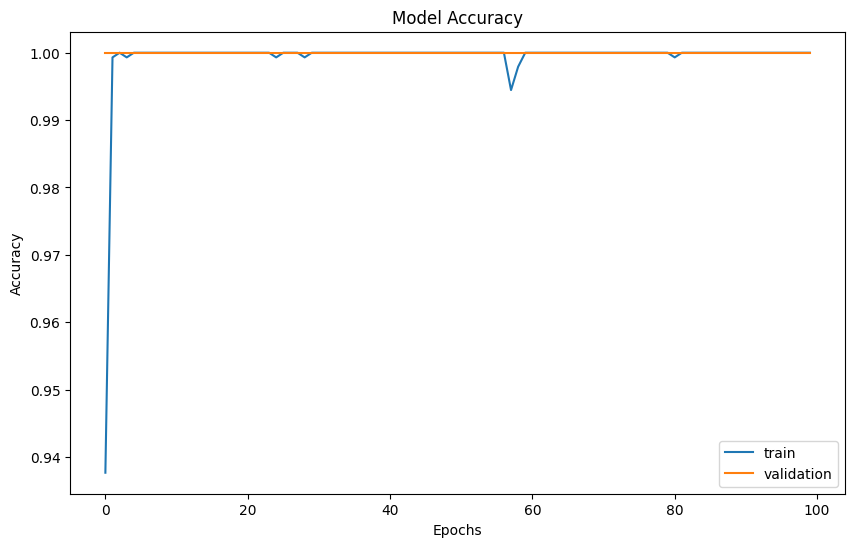

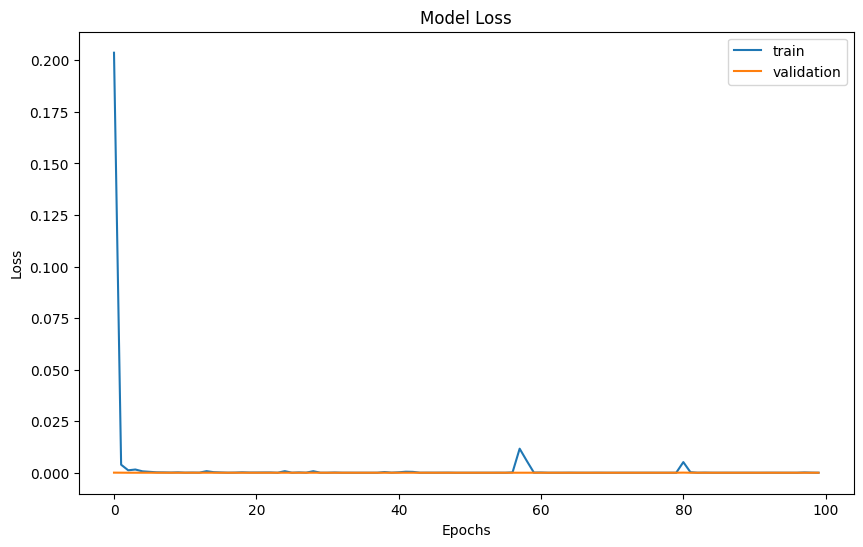

In [28]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths to the folders
base_dir = './datasets/dataset_ready/datasets_images'
categories = ['RPi1Dump', 'RPi2Dump', 'RPi3Dump']
# Image parameters
img_height, img_width = 64, 64
batch_size = 32

# Load images and labels
def load_data(base_dir, categories, img_height, img_width):
    images = []
    labels = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(base_dir, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('model_accuracy.png')  # Save the plot as an image file
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('model_loss.png')  # Save the plot as an image file
plt.show()
